In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm

## Descente en dimension 1

In [2]:
def descente_gradient(f,df,n_étapes=15, ε=0.1, x0=0):
    x_vect = [x0]*n_étapes
    y_vect = [0]*n_étapes
    y_vect[0] = f(x0)
    for i in range(1,n_étapes):
        x = x_vect[i-1]
        x_vect[i] = x - ε*df(x)
        y_vect[i] = f(x_vect[i])
    return x_vect, y_vect

In [3]:
f_xcarré = lambda x : x**2
df_xcarré = lambda x : 2*x
f_pas_convexe = lambda x :  x**3 / 3 - x**2 -3*x +1
df_pas_convexe = lambda x : x**2 - 2*x -3

## Exemples

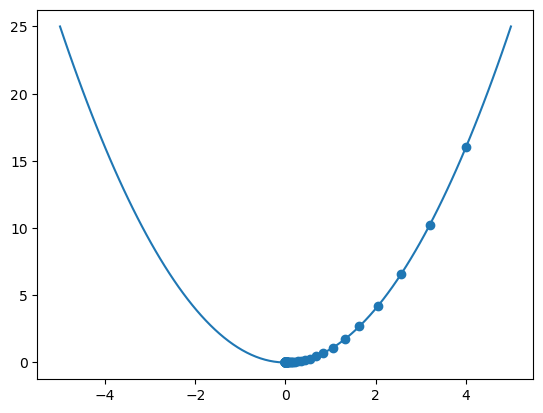

In [4]:
f = f_xcarré
df = df_xcarré
x = np.linspace(-5,5,100)
y = f(x)
plt.plot(x,y)
x,y = descente_gradient(f, df, x0=4, ε = 0.1, n_étapes=100)
plt.scatter(x,y)
plt.show()

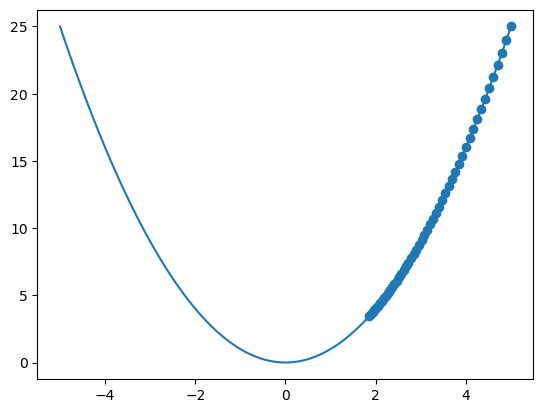

In [5]:
f = f_xcarré
df = df_xcarré
x = np.linspace(-5,5,100)
y = f(x)
plt.plot(x,y)
x,y = descente_gradient(f, df, x0=5, ε = 0.01, n_étapes=50)
plt.scatter(x,y)
plt.show()

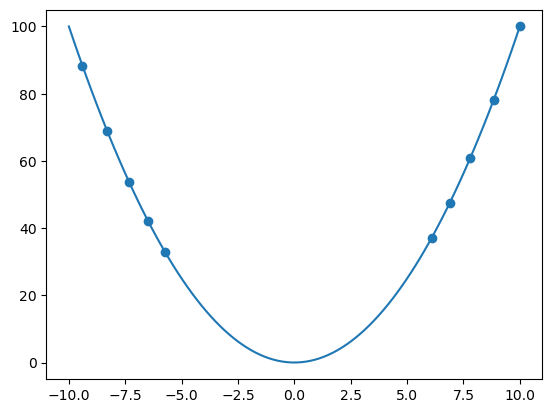

In [6]:
f = f_xcarré
df = df_xcarré
x = np.linspace(-10,10,100)
y = f(x)
plt.plot(x,y)
x,y = descente_gradient(f, df, x0=10, ε = 0.97, n_étapes=10)
plt.scatter(x,y)
plt.show()

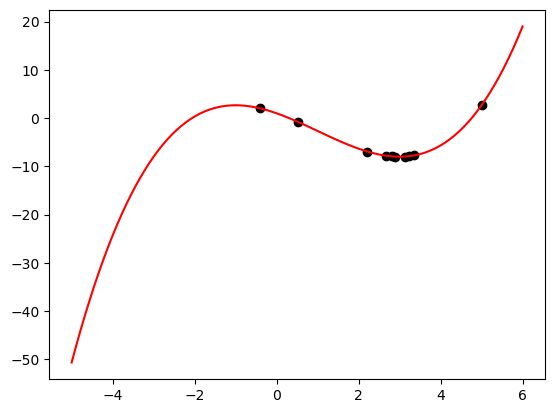

In [7]:
f = f_pas_convexe
df = df_pas_convexe
x = np.linspace(-5,6,100)
y = f(x)
plt.plot(x,y, c="r")
x,y = descente_gradient(f, df, x0=5, ε = 0.45, n_étapes=10)
plt.scatter(x,y, c="black")
plt.show()

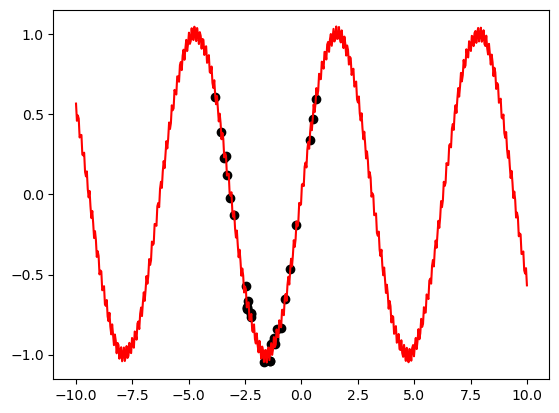

In [8]:
f = lambda x : np.sin(x) + 1/20 * np.sin(50*x)
df = lambda x : np.cos(x) + 5/2 * np.cos(50*x)
x = np.linspace(-10,10,500)
y = f(x)
plt.plot(x,y, c="r")
x,y = descente_gradient(f, df, x0=0.5, ε = np.random.random(), n_étapes=30)
plt.scatter(x,y, c="black")
plt.show()
# plt.plot(y, label="Évolution des valeurs de f")
# plt.title("La descente qui monte")
# plt.legend()
# plt.show()

# Descente en dimension plus grande

In [9]:
def descente_gradient(f,df,x0, n_étapes=15, ε=0.1):
    x_vect = np.empty(shape = (n_étapes, len(x0)))
    x_vect[0,:] = x0
    y_vect = np.zeros(n_étapes)
    y_vect[0] = f(x0)
    for i in range(1,n_étapes):
        x = x_vect[i-1,:]
        x_vect[i,:] = x - ε*df(x)
        y_vect[i] = f(x_vect[i,:])
    return x_vect, y_vect

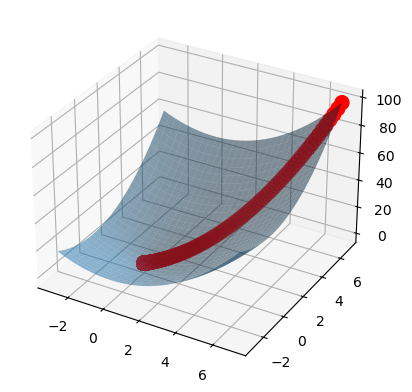

In [10]:
f = lambda x : np.sum(np.asarray(x)**2, axis=0) # = x² + y²
df = lambda x : 2*np.asarray(x) # = (2x, 2y)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.outer(np.linspace(-3, 7, 30), np.ones(30)) ## ou meshgrid
y = x.copy().T # transpose

ax.plot_surface(x,y,f([x,y]), alpha = 0.5)

x,y = descente_gradient(f,df, [7,7], ε = 0.01, n_étapes = 1000)
ax.scatter(x[:,0], x[:,1], y, s=100, c="r")

# Descente avec auto différentiation

In [11]:
def descente_gradient_auto(f,x0, n_étapes=15, ε=0.1, verbose = False):
    import mygrad as mg
    try: 
        len(x0)
    except:
        x0 = np.array([x0])
    x_vect = [x0]
    y_vect = [f(x0)]
    x = mg.tensor(x0)
    for i in range(1,n_étapes):
        x = mg.tensor(x_vect[i-1])
        f(x).backward()
        print(x.grad) if verbose else 0
        x_vect.append(x - ε*np.asarray(x.grad))
        y_vect.append(f(x_vect[i]))
    return np.array(x_vect), np.array(y_vect)

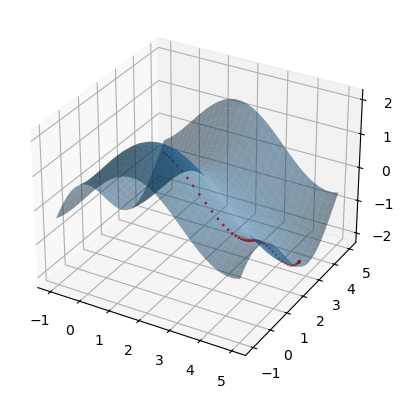

In [12]:
f = lambda x : np.sin(x[0]) + np.cos(x[1])
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
x = np.outer(np.linspace(-1, 5, 30), np.ones(30))
y = x.copy().T # transpose
ax.plot_surface(x,y,f([x,y]), alpha = 0.5)

x,y = descente_gradient_auto(f, x0=[2,0.005], ε = 0.2, n_étapes = 100)
ax.scatter(x[:,0], x[:,1], y, s=1, c="r")


# Une tache de classification simple

In [13]:
from pandas import read_csv
from sklearn.model_selection import train_test_split

In [14]:
read_csv("banknote", header=None)

0         1        2        3  4
0     3.62160   8.66610  -2.8073 -0.44699  0
1     4.54590   8.16740  -2.4586 -1.46210  0
2     3.86600  -2.63830   1.9242  0.10645  0
3     3.45660   9.52280  -4.0112 -3.59440  0
4     0.32924  -4.45520   4.5718 -0.98880  0
...       ...       ...      ...      ... ..
1367  0.40614   1.34920  -1.4501 -0.55949  1
1368 -1.38870  -4.87730   6.4774  0.34179  1
1369 -3.75030 -13.45860  17.5932 -2.77710  1
1370 -3.56370  -8.38270  12.3930 -1.28230  1
1371 -2.54190  -0.65804   2.6842  1.19520  1

[1372 rows x 5 columns]

In [15]:
data = read_csv("banknote", header=None)
data=np.array(data)

In [16]:
X = data[:,:-1]
Y = data[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [17]:
logistic = lambda x : 1/(1+np.exp(-x))
prédiction = lambda X, theta : logistic(np.asarray(X)@theta[:-1] + theta[-1])
cout = lambda y1, y2 : (y1-y2)**2
def loss(theta, X=X_train, Y=y_train):
    return np.mean(cout(prédiction(X,theta),Y[:,None]), axis=0) # le modèle

In [18]:
%%time
theta0 = np.random.uniform(size=(len(X[0,:])+1,1))
x,y = descente_gradient_auto(loss, theta0, n_étapes = 10_000, ε = 0.01, verbose = 0)

CPU times: user 9.16 s, sys: 341 ms, total: 9.5 s
Wall time: 9.58 s


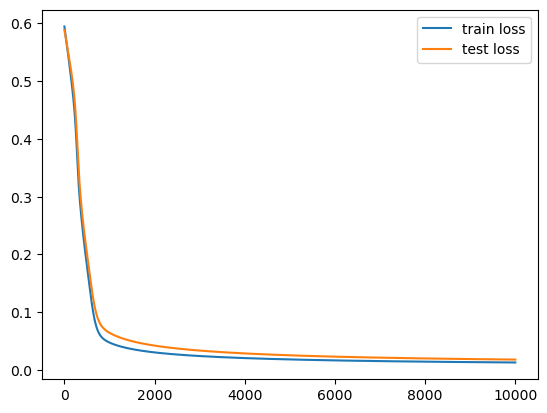

In [19]:
plt.plot(y, label = "train loss")
plt.plot([loss(truc, X_test, y_test) for truc in x], label = "test loss")
plt.legend()
plt.plot();

In [20]:
## Check for a random index
k = np.random.randint(len(X),size=1)
theta = x[-1] ## Le dernier élément de la descente de gradient
print(f"k = {k}, Prediction : {np.round(prédiction(X[k], theta).squeeze(), decimals=2)}, Réalité : {Y[k].squeeze()}")

k = [49], Prediction : 0.0, Réalité : 0.0


In [21]:
## Accuracy
(np.abs(prédiction(X, theta)-Y[:,None]) < 0.5).mean()

0.9883381924198251

In [22]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
rf.score(X_test, y_test)

0.9890909090909091

In [23]:
np.mean(rf.predict(X_test) == y_test)

0.9890909090909091